Acceso al directorio local

In [1]:
%cd "C:\\Users\\jorge\\Documents\\Videogames_img\\TC3002B"
#!ls

C:\Users\jorge\Documents\Videogames_img\TC3002B


C:\Users\jorge\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Importar librerias y definir directorios de carpetas de Train y Test

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'Dataset'
train_dir = os.path.join(base_dir,'Train')
test_dir = os.path.join(base_dir, 'Test')
batch_size = 32

Generar dataset de Train

Found 8000 images belonging to 10 classes.
{'Among Us': 0, 'Apex Legends': 1, 'Fortnite': 2, 'Forza Horizon': 3, 'Free Fire': 4, 'Genshin Impact': 5, 'God of War': 6, 'Minecraft': 7, 'Roblox': 8, 'Terraria': 9}


<Figure size 640x480 with 0 Axes>

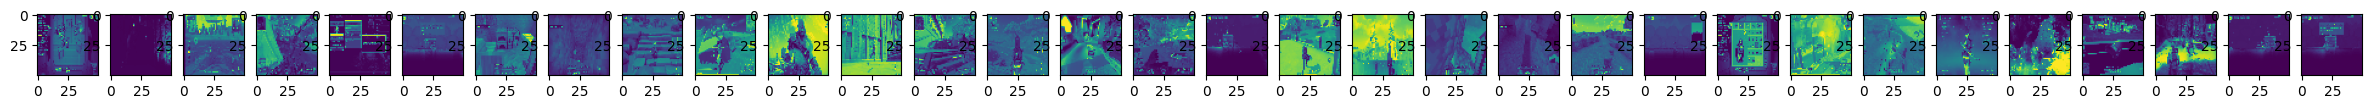

In [7]:
train_ds = ImageDataGenerator(
    rescale = 1./255,
    #zoom_range = 0.3,
    #shear_range = 0.3
    )


train_generator = train_ds.flow_from_directory(
    train_dir,
    target_size = (50,50),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

class_names = train_generator.class_indices
print(class_names)

images , labels = train_generator[0]
plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

Generar dataset para validation

Generar y preparar dataset de Test

In [8]:
test_ds = ImageDataGenerator(
    rescale = 1./255,
    #zoom_range = 0.3,
    #shear_range = 0.3
    )


test_generator = test_ds.flow_from_directory(
    test_dir,
    target_size = (50,50),
    batch_size = batch_size,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)


Found 2000 images belonging to 10 classes.


# Modelo Base

In [15]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

In [14]:
model = models.Sequential()
model.add(layers.InputLayer(input_shape = (50,50,1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2), padding = 'same'))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(64,activation='sigmoid'))
model.add(layers.Dropout(rate = 0.2))
model.add(layers.Dense(10,activation='sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer='adam',
						metrics=['acc'])

history = model.fit(
						train_generator,
						epochs = 5)

acc = history.history['acc']
loss = history.history['loss']

c:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 8)      │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       991,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,011,218 (3.86 MB)

 Trainable params: 1,011,218 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


c:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 34/250 ━━━━━━━━━━━━━━━━━━━━ 5:21 1s/step - acc: 0.1311 - loss: 2.3694

KeyboardInterrupt: 

In [ ]:
model.save('videogame_img_v1.h5')

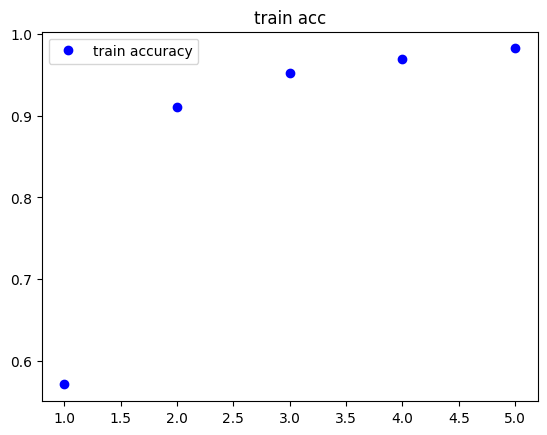

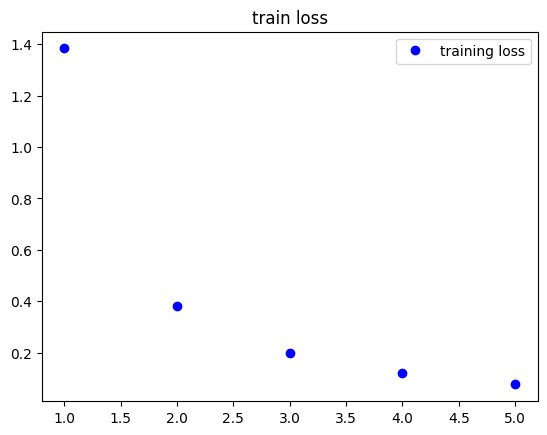

In [ ]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

Evaluate Model

In [16]:

savedModel = load_model('videogame_img_v1.h5')

test_loss_original, test_acc_original = savedModel.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc_original)

 1/25 ━━━━━━━━━━━━━━━━━━━━ 11s 481ms/step - acc: 0.9375 - loss: 0.1632

c:\Users\jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - acc: 0.9709 - loss: 0.1006

test acc :
 0.9725000262260437


In [20]:
savedModel.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 22, 22, 8)      │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │       991,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,011,220 (3.86 MB)

 Trainable params: 1,011,218 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [32]:
test_imgs = test_generator[0][0]
test_labels = test_generator[0][1]


predictions = savedModel.predict(test_imgs)
classes_x = np.argmax(predictions,axis=1)
classes_x
#test_labels
test_labels_y = np.argmax(test_labels,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [66]:
print('Model         ', 'test loss            ', ' test accuracy ') 
print('Original      ', test_loss_original, '   ', test_acc_original)

from tensorflow.math import confusion_matrix

mat = confusion_matrix(classes_x, test_labels_y, num_classes= 10)
print('                   ', 'Among Us ',                             'Apex Legends ',                   'Fortnite ',                    'Forza Horizon ',                 'Free Fire ',                 'Genshin Impact ',                       'God of War ', 'Minecraft ', 'Roblox ', 'Terraria') 
print('pred Among Us      ',"   ", np.array(mat[0][0]),"        ", np.array(mat[0][1]), "          ", np.array(mat[0][2]), "        ", np.array(mat[0][3]), "           ", np.array(mat[0][4]), "           ", np.array(mat[0][5]), "          ", np.array(mat[0][6]), "        ", np.array(mat[0][7]), "        ", np.array(mat[0][8]), "     ", np.array(mat[0][9])) 
print('pred Apex Legends  ',"   ", np.array(mat[1][0]),"        ", np.array(mat[1][1]), "          ", np.array(mat[1][2]), "        ", np.array(mat[1][3]), "           ", np.array(mat[1][4]), "           ", np.array(mat[1][5]), "          ", np.array(mat[1][6]), "        ", np.array(mat[1][7]), "        ", np.array(mat[1][8]), "     ", np.array(mat[1][9]))
print('pred Fortnite      ',"   ", np.array(mat[2][0]),"        ", np.array(mat[2][1]), "          ", np.array(mat[2][2]), "        ", np.array(mat[2][3]), "           ", np.array(mat[2][4]), "           ", np.array(mat[2][5]), "          ", np.array(mat[2][6]), "        ", np.array(mat[2][7]), "        ", np.array(mat[2][8]), "     ", np.array(mat[2][9]))
print('pred Forza Horizon ',"   ", np.array(mat[3][0]),"        ", np.array(mat[3][1]), "          ", np.array(mat[3][2]), "        ", np.array(mat[3][3]), "           ", np.array(mat[3][4]), "           ", np.array(mat[3][5]), "          ", np.array(mat[3][6]), "        ", np.array(mat[3][7]), "        ", np.array(mat[3][8]), "     ", np.array(mat[3][9]))
print('pred Free Fire     ',"   ", np.array(mat[4][0]),"        ", np.array(mat[4][1]), "          ", np.array(mat[4][2]), "        ", np.array(mat[4][3]), "           ", np.array(mat[4][4]), "           ", np.array(mat[4][5]), "          ", np.array(mat[4][6]), "        ", np.array(mat[4][7]), "        ", np.array(mat[4][8]), "     ", np.array(mat[4][9]))
print('pred Genshin Impact',"   ", np.array(mat[5][0]),"        ", np.array(mat[5][1]), "          ", np.array(mat[5][2]), "        ", np.array(mat[5][3]), "           ", np.array(mat[5][4]), "           ", np.array(mat[5][5]), "          ", np.array(mat[5][6]), "        ", np.array(mat[5][7]), "        ", np.array(mat[5][8]), "     ", np.array(mat[5][9]))
print('pred God of War    ',"   ", np.array(mat[6][0]),"        ", np.array(mat[6][1]), "          ", np.array(mat[6][2]), "        ", np.array(mat[6][3]), "           ", np.array(mat[6][4]), "           ", np.array(mat[6][5]), "          ", np.array(mat[6][6]), "        ", np.array(mat[6][7]), "        ", np.array(mat[6][8]), "     ", np.array(mat[6][9]))
print('pred Minecraft     ',"   ", np.array(mat[7][0]),"        ", np.array(mat[7][1]), "          ", np.array(mat[7][2]), "        ", np.array(mat[7][3]), "           ", np.array(mat[7][4]), "           ", np.array(mat[7][5]), "          ", np.array(mat[7][6]), "        ", np.array(mat[7][7]), "        ", np.array(mat[7][8]), "     ", np.array(mat[7][9]))
print('pred Roblox        ',"   ", np.array(mat[8][0]),"        ", np.array(mat[8][1]), "          ", np.array(mat[8][2]), "        ", np.array(mat[8][3]), "           ", np.array(mat[8][4]), "           ", np.array(mat[8][5]), "          ", np.array(mat[8][6]), "        ", np.array(mat[8][7]), "        ", np.array(mat[8][8]), "     ", np.array(mat[8][9]))
print('pred Terraria      ',"   ", np.array(mat[9][0]),"        ", np.array(mat[9][1]), "          ", np.array(mat[9][2]), "        ", np.array(mat[9][3]), "           ", np.array(mat[9][4]), "           ", np.array(mat[9][5]), "          ", np.array(mat[9][6]), "        ", np.array(mat[9][7]), "        ", np.array(mat[9][8]), "     ", np.array(mat[9][9]))




Model          test loss              test accuracy 
Original       0.09617460519075394     0.9725000262260437
                    Among Us  Apex Legends  Fortnite  Forza Horizon  Free Fire  Genshin Impact  God of War  Minecraft  Roblox  Terraria
pred Among Us           2          0            0          0             0             0            0          0          0       0
pred Apex Legends       0          5            0          0             0             0            0          0          0       0
pred Fortnite           0          0            4          0             0             0            0          0          0       0
pred Forza Horizon      0          0            0          3             0             0            0          0          0       0
pred Free Fire          0          0            0          0             3             0            0          0          0       0
pred Genshin Impact     0          0            0          0             0             4     

https://www.iasj.net/iasj/download/7e648e76d9363337

https://www.researchgate.net/profile/Mohd-Azlan-Abu/publication/332850035_A_study_on_Image_Classification_based_on_Deep_Learning_and_Tensorflow/links/5cccd2dfa6fdccc9dd8b3e69/A-study-on-Image-Classification-based-on-Deep-Learning-and-Tensorflow.pdf
